In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# create dataframe
data_breaches = pd.read_csv("data_breaches.csv")
# display a previewd
data_breaches.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


In [4]:
# print the number of cols, rows
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nThere are " + str(data_breaches.shape[1]) + " columns and " + str(data_breaches.shape[0]) + " rows.\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
There are 7 columns and 352 rows.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [5]:
# basic statistics for the numerical columns
data_breaches.describe()

,Unnamed: 0
count,352.000000
mean,175.500000
std,101.757883
min,0.000000
25%,87.750000
50%,175.500000
75%,263.250000
max,351.000000


In [6]:
# show the data types
data_breaches.dtypes

Unnamed: 0            int64
Entity               object
Year                 object
Records              object
Organization type    object
Method               object
Sources              object
dtype: object

In [7]:
# print all the column names
data_breaches.columns

Index(['Unnamed: 0', 'Entity', 'Year', 'Records', 'Organization type',
       'Method', 'Sources'],
      dtype='object')

In [8]:
# display the number of unique values in each categorical column
object_columns = data_breaches.select_dtypes(include=['object']).columns  # set up a list of only the `object` dtypes

for column in object_columns:  # iterate thru columns list
    unique_count = data_breaches[column].nunique()  # count how many unique values are present 
    print(f"There are {unique_count} different values in `{column}`.")  # print the number in the specified format

There are 331 different values in `Entity`.
There are 22 different values in `Year`.
There are 255 different values in `Records`.
There are 70 different values in `Organization type`.
There are 25 different values in `Method`.
There are 312 different values in `Sources`.


In [9]:
# get the unique values where it makes sense
print("Unique values in `Entity`:\n", data_breaches['Entity'].unique())
print("\nUnique values in `Year`:\n", data_breaches['Year'].unique())
print("\nUnique values in `Records`:\n", data_breaches['Records'].unique())
print("\nUnique values in `Organization type`:\n", data_breaches['Organization type'].unique())
print("\nUnique values in `Method`:\n", data_breaches['Method'].unique())
print("\nUnique values in `Sources`:\n", data_breaches['Sources'].unique())

Unique values in `Entity`:
 ['21st Century Oncology' '500px' 'Accendo Insurance Co.'
 'Adobe Systems Incorporated' 'Adobe Inc.' 'Advocate Medical Group'
 'AerServ (subsidiary of InMobi)' 'Affinity Health Plan, Inc.' 'Airtel'
 'Air Canada' 'Amazon Japan G.K.' 'TD Ameritrade' 'Ancestry.com'
 'Animal Jam' 'Ankle & Foot Center of Tampa Bay, Inc.' 'Anthem Inc.' 'AOL'
 'Apple, Inc./BlueToad' 'Apple' 'Apple Health Medicaid' 'Ashley Madison'
 'AT&T' 'Atraf' 'Auction.co.kr' 'Australian Immigration Department'
 'Australian National University' 'Automatic Data Processing'
 'AvMed, Inc.' "Bailey's Inc." 'The Bank of New York Mellon'
 'Bank of America' 'Barnes & Noble' 'Bell Canada' 'Benesse' 'Betfair'
 'Bethesda Game Studios' 'Betsson Group' 'Blank Media Games'
 'Blizzard Entertainment' 'BlueCross BlueShield of Tennessee'
 'BMO and Simplii' '2018 British Airways cyberattack' 'British Airways'
 '2019 Bulgarian revenue agency hack'
 'California Department of Child Support Services' 'Canva' 'Capcom'


In [10]:
# check for missing values
missing_values = data_breaches.isnull().sum()

# calculate missing value counts for those columns where missing values are greater than zero
missing_values_df = pd.DataFrame(missing_values[missing_values > 0], columns=['Count Missing'])

# calculate the percentage of missing values for each column
missing_pct = ((missing_values / data_breaches.shape[0] * 100).round(3))
# add missing count and percent to table
missing_values_df["% Missing"] = missing_pct

# check if there are no missing values, and print a message if that's the case
if missing_values_df.empty:
    print("There are no missing values.")
else:
    # display the table if there are missing values
    display(missing_values_df)

,Count Missing,% Missing
Records,2,0.568
Method,1,0.284
Sources,2,0.568


In [11]:
# check for duplicate rows
duplicate_rows = data_breaches.duplicated().sum()
print("There are " + str(duplicate_rows) + " duplicate row(s).\n")

# get a boolean series indicating which rows are duplicates (including the original rows)
duplicate_mask = data_breaches.duplicated(keep=False)

# use mask to filter and display both the original and duplicate rows
duplicate_rows_df = data_breaches[duplicate_mask]
duplicate_rows_df

There are 0 duplicate row(s).



,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources


## cleaning

In [78]:
# list the years in the data, in order
records_counts = data_breaches.groupby('Records').size().reset_index(name='num_breaches')
records_counts

,Records,num_breaches
0,10 locations,1
1,100 terabytes,1
2,100000,3
3,1000000,6
4,10000000,2
...,...,...
250,"over 5,000,000",1
251,tens of thousands,1
252,undisclosed,1
253,unknown,21


looking at the `Year` column, three entries indicate the breach spanned over two separate years. for simplicity, we will convert these to the first listed year.  

In [12]:
# list the years in the data, in order
year_counts = data_breaches.groupby('Year').size().reset_index(name='num_breaches')
year_counts

,Year,num_breaches
0,2004,2
1,2005,6
2,2006,7
3,2007,12
4,2008,16
5,2009,13
6,2010,19
7,2011,34
8,2012,23
9,2013,28


In [63]:
# query '2014 and 2015' to get its index
data_breaches.query("Year == '2014 and 2015'")

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources,int_records,int_year,broad_categories,method_categories,num_records,num_year
144,144,Hilton Hotels,2014 and 2015,363000,hotel,hacked,[194][195],363000.0,NaN,None,Hacking/Cyberattacks,363000.0,NaN


In [64]:
# query '2018-2019' to get its index
data_breaches.query("Year == '2018-2019'")

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources,int_records,int_year,broad_categories,method_categories,num_records,num_year
96,96,"Earl Enterprises(Buca di Beppo, Earl of Sandwi...",2018-2019,2000000,restaurant,hacked,[122],2000000.0,NaN,None,Hacking/Cyberattacks,2000000.0,NaN


In [65]:
# query '2019-2020' to get its index
data_breaches.query("Year == '2019-2020'")

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources,int_records,int_year,broad_categories,method_categories,num_records,num_year
94,94,EasyJet,2019-2020,"9,000,000 (approx) - basic booking, 2208 (cred...",transport,hacked,[119][120],NaN,NaN,None,Hacking/Cyberattacks,NaN,NaN


In [66]:
# replace '2014 and 2015' with '2014' at index 144
data_breaches.loc[144, 'Year'] = '2014'

# replace '2018-2019' with '2018' at index 96
data_breaches.loc[96, 'Year'] = '2018'

# replace '2019-2020' with '2019' at index 94
data_breaches.loc[94, 'Year'] = '2019'

Text(0, 0.5, 'Number of data breaches')

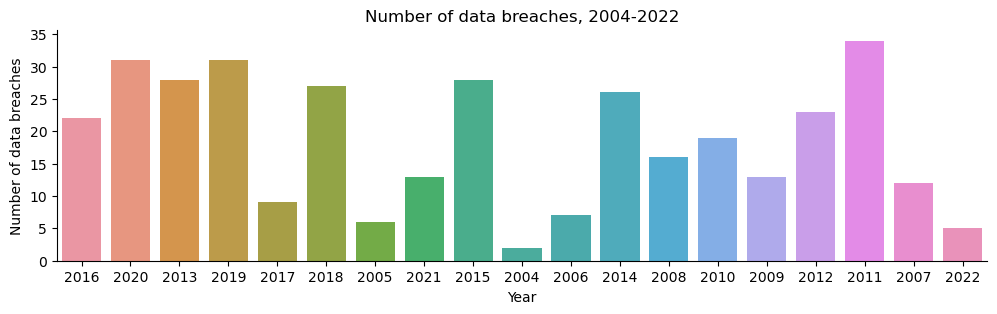

In [77]:
# Plot: number of data breaches over time
f, ax = plt.subplots(figsize=(12, 3))
sns.despine()

sns.countplot(x='Year', data=data_breaches, ax=ax)
ax.set_title('Number of data breaches, 2004-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Number of data breaches')

currently, `Records` and `Year` are strings. we will convert them to numerical below:

In [67]:
# convert `Records` to numeric, setting non-numeric values to NaN
data_breaches['num_records'] = pd.to_numeric(data_breaches['Records'], errors='coerce')

# convert `Year` to numeric, setting non-numeric values to NaN
data_breaches['num_year'] = pd.to_numeric(data_breaches['Year'], errors='coerce')

# check the converted data types
data_breaches.dtypes

Unnamed: 0             int64
Entity                object
Year                  object
Records               object
Organization type     object
Method                object
Sources               object
int_records          float64
int_year             float64
broad_categories      object
method_categories     object
num_records          float64
num_year               int64
dtype: object

<Axes: >

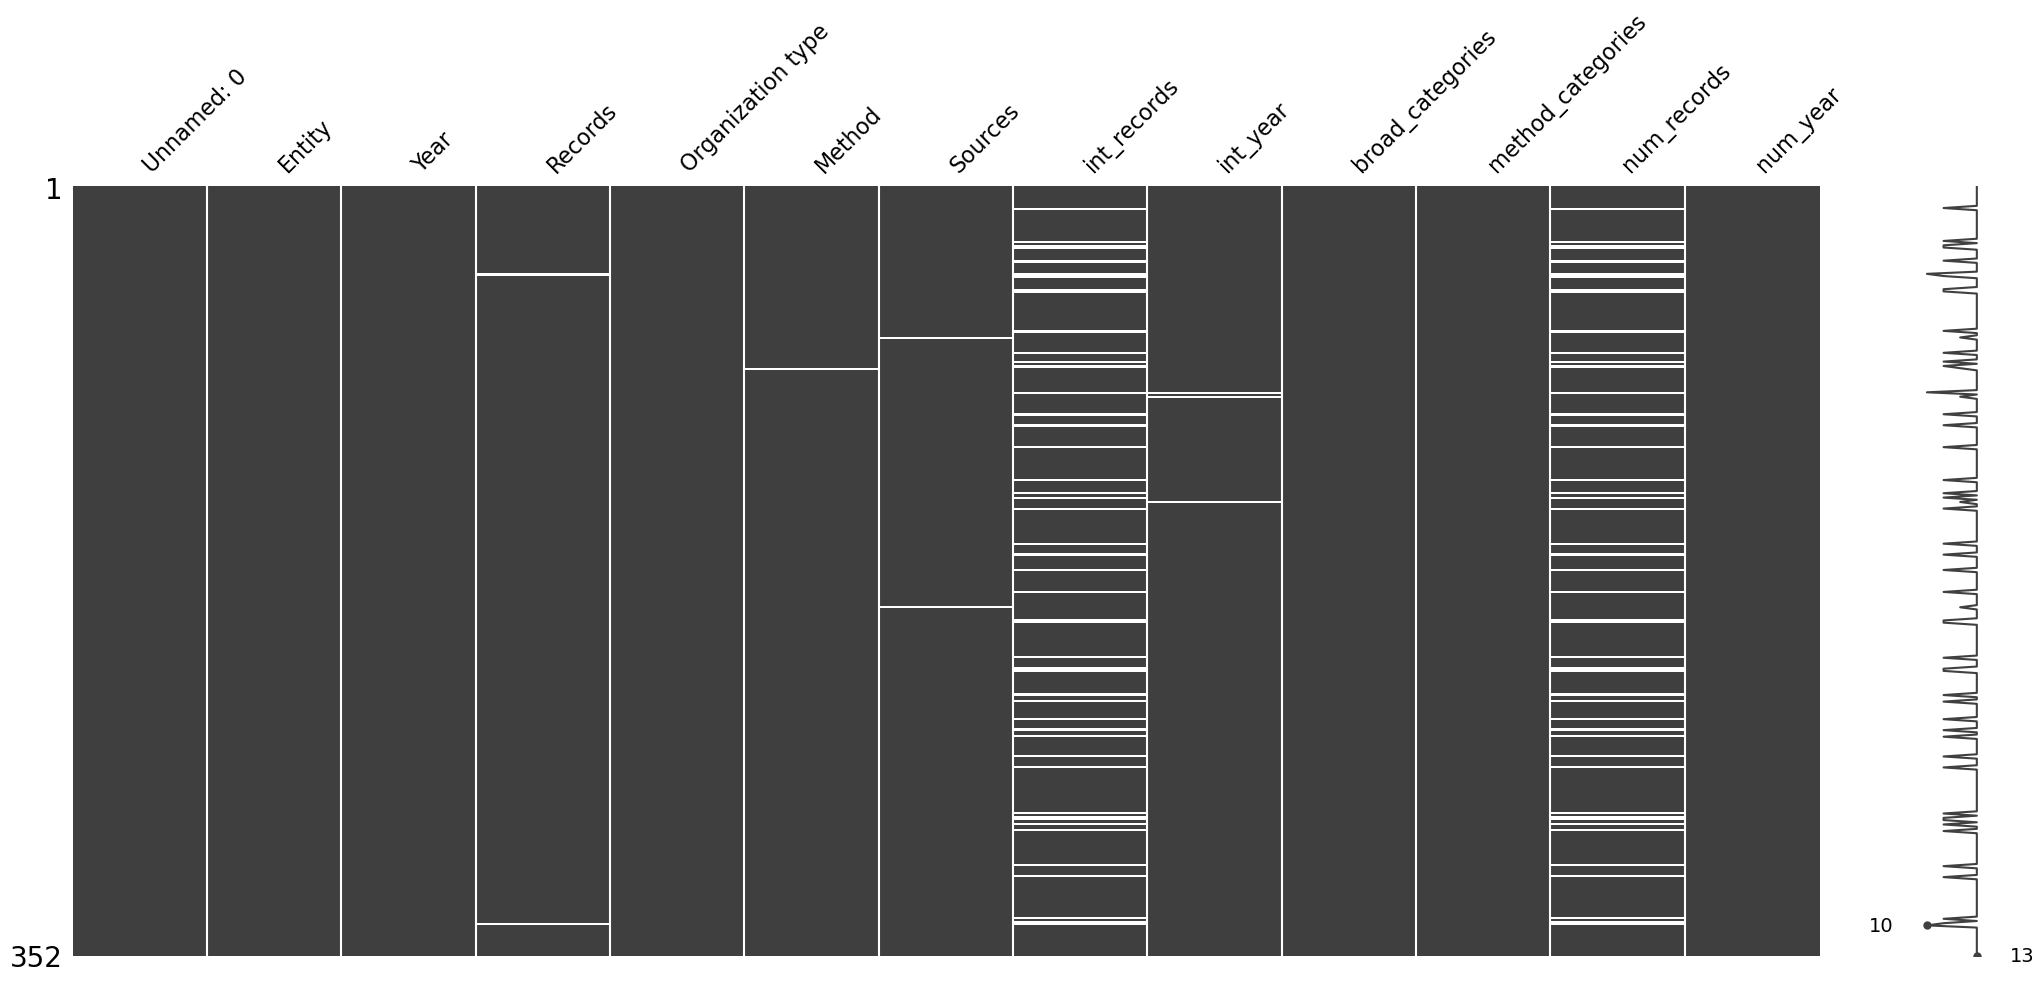

In [68]:
# visualize the missing values in the `num_records` column
import missingno as msno
msno.matrix(data_breaches)

In [69]:
# check for missing values
missing_values = data_breaches.isnull().sum()

# calculate missing value counts for those columns where missing values are greater than zero
missing_values_df = pd.DataFrame(missing_values[missing_values > 0], columns=['Count Missing'])

# calculate the percentage of missing values for each column
missing_pct = ((missing_values / data_breaches.shape[0] * 100).round(3))
# add missing count and percent to table
missing_values_df["% Missing"] = missing_pct

# check if there are no missing values, and print a message if that's the case
if missing_values_df.empty:
    print("There are no missing values.")
else:
    # display the table if there are missing values
    display(missing_values_df)

,Count Missing,% Missing
Records,2,0.568
Method,1,0.284
Sources,2,0.568
int_records,47,13.352
int_year,3,0.852
num_records,47,13.352


In [29]:
Method_counts = data_breaches['Method'].value_counts().rename('Method_counts')
Method_counts

hacked                                                  192
poor security                                            43
lost / stolen media                                      33
accidentally published                                   21
inside job                                               19
lost / stolen computer                                   16
unknown                                                   7
improper setting, hacked                                  2
poor security/inside job                                  2
intentionally lost                                        1
accidentally exposed                                      1
publicly accessible Amazon Web Services (AWS) server      1
hacked/misconfiguration                                   1
rogue contractor                                          1
ransomware hacked                                         1
misconfiguration/poor security                            1
unprotected api                         

In [31]:
org_counts = data_breaches['Organization type'].value_counts().rename('org_counts')
org_counts

web                           53
healthcare                    47
financial                     38
government                    30
retail                        27
                              ..
humanitarian                   1
special public corporation     1
shopping                       1
local search                   1
various                        1
Name: org_counts, Length: 70, dtype: int64

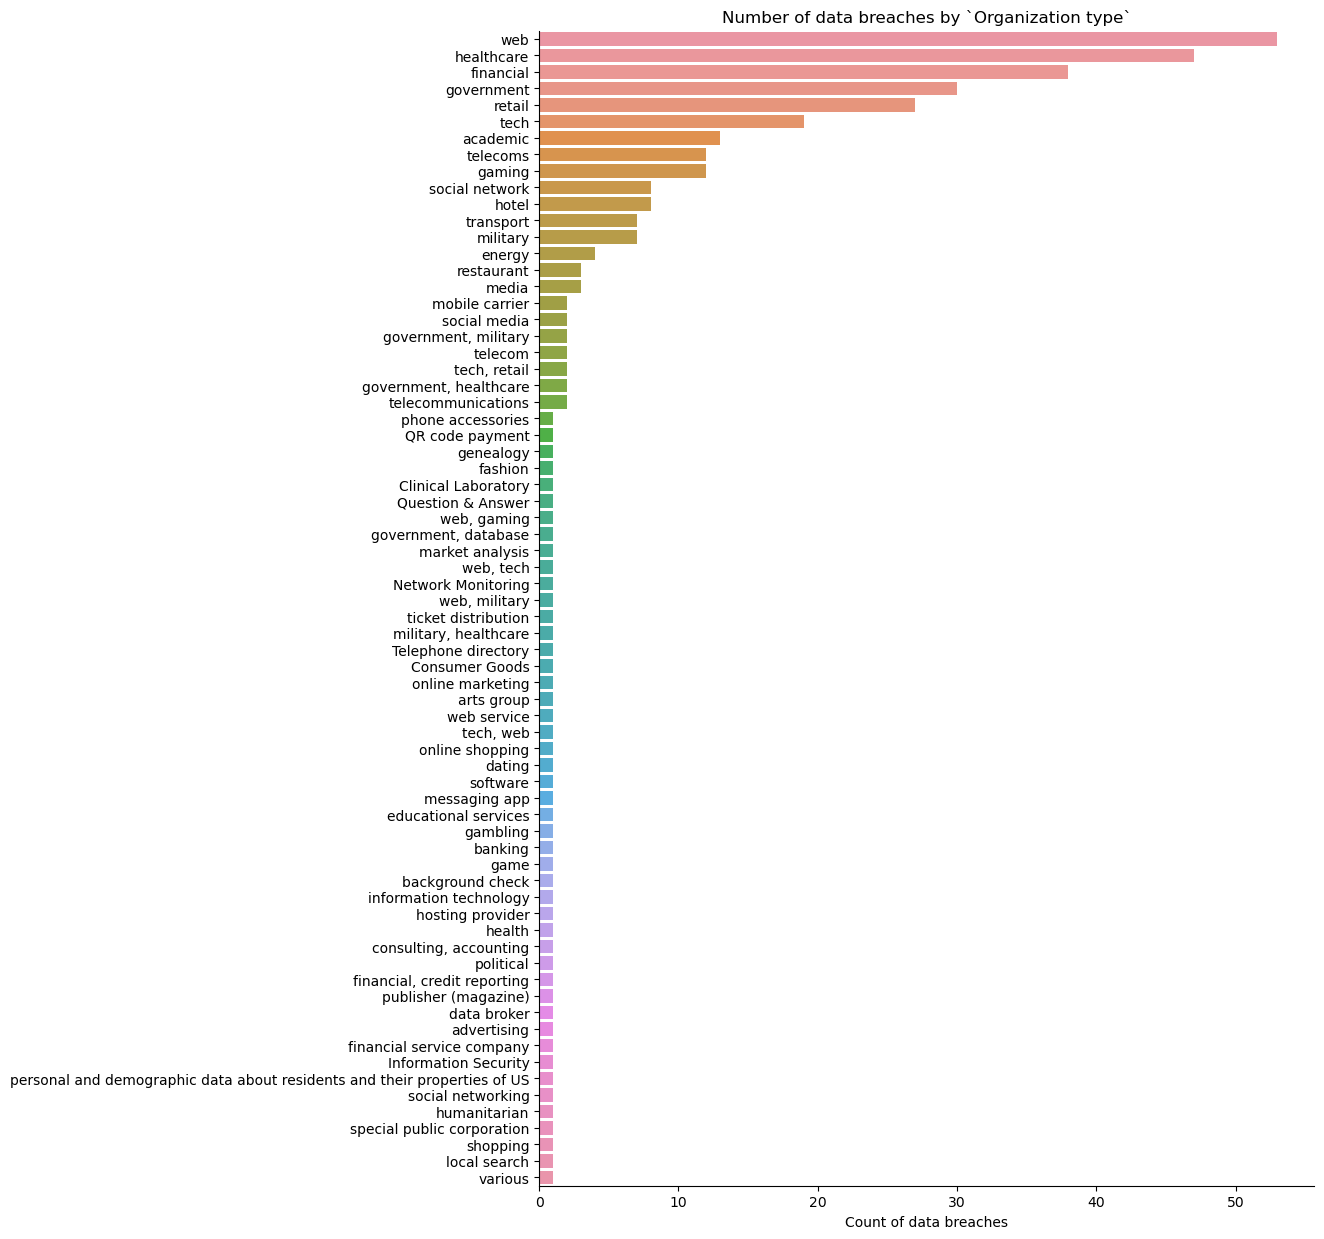

In [82]:
# Plot: count of data breaches by `Organization type`
org_order = data_breaches['Organization type'].value_counts().index  # specify descending order for the organizations

f, ax = plt.subplots(figsize=(10, 15))
sns.despine()
sns.countplot(y='Organization type', data=data_breaches, order=org_order, ax=ax)
ax.set_title('Number of data breaches, by `Organization type`')
ax.set_xlabel('Count of data breaches')
ax.set_ylabel('')
plt.show()

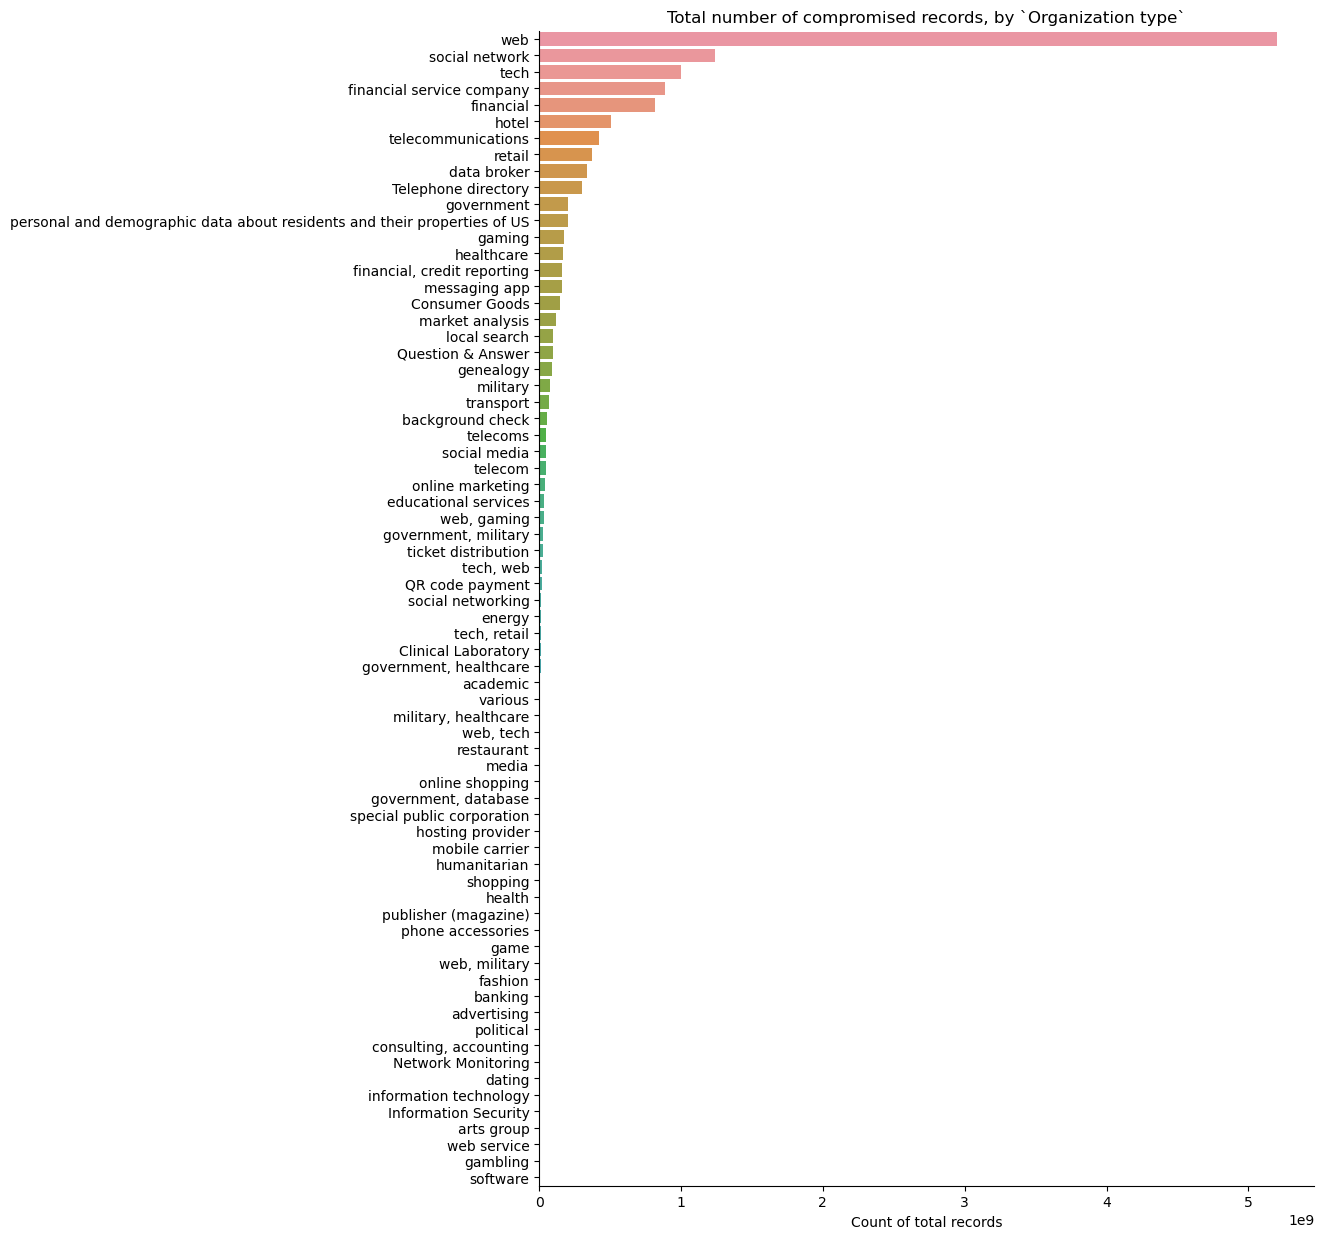

In [87]:
# Plot: total compromised records for each `Organization type`

# group `Organization type` data by records
org_records = data_breaches.groupby('Organization type', sort=False)["num_records"].sum().reset_index(name ='Total Records') 
org_records_sorted = org_records.sort_values(by='Total Records', ascending=False)  # specify the order of the filtered data

f, ax = plt.subplots(figsize=(10, 15))
sns.despine()
sns.barplot(x='Total Records', y='Organization type', data=org_records_sorted, ax=ax)
ax.set_title('Total number of compromised records, by `Organization type`')
ax.set_xlabel('Count of total records')
ax.set_ylabel('')
plt.show()

Below is the breakdown of which types of organizations are affected. 

the left shows which types of organizations most frequently appear in the data. That is, the types of organizations that most frequently experience data breaches.  
The right shows the total records stolen as a part of breaches. it has a different scale, but it is in the same order as the left plot, to make it easy to compare.  

what does it show?  
- the combined severity of breaches for each organization type (at least in terms of records) is not necessarily reflected in the frequency of breaches. in other words, some sectors are hit more frequently than others, but many of these breaches are less-severe. 
- at this time, it would be important to consider the 47 non-numerical entries in `Records` to find out if those would change this.  

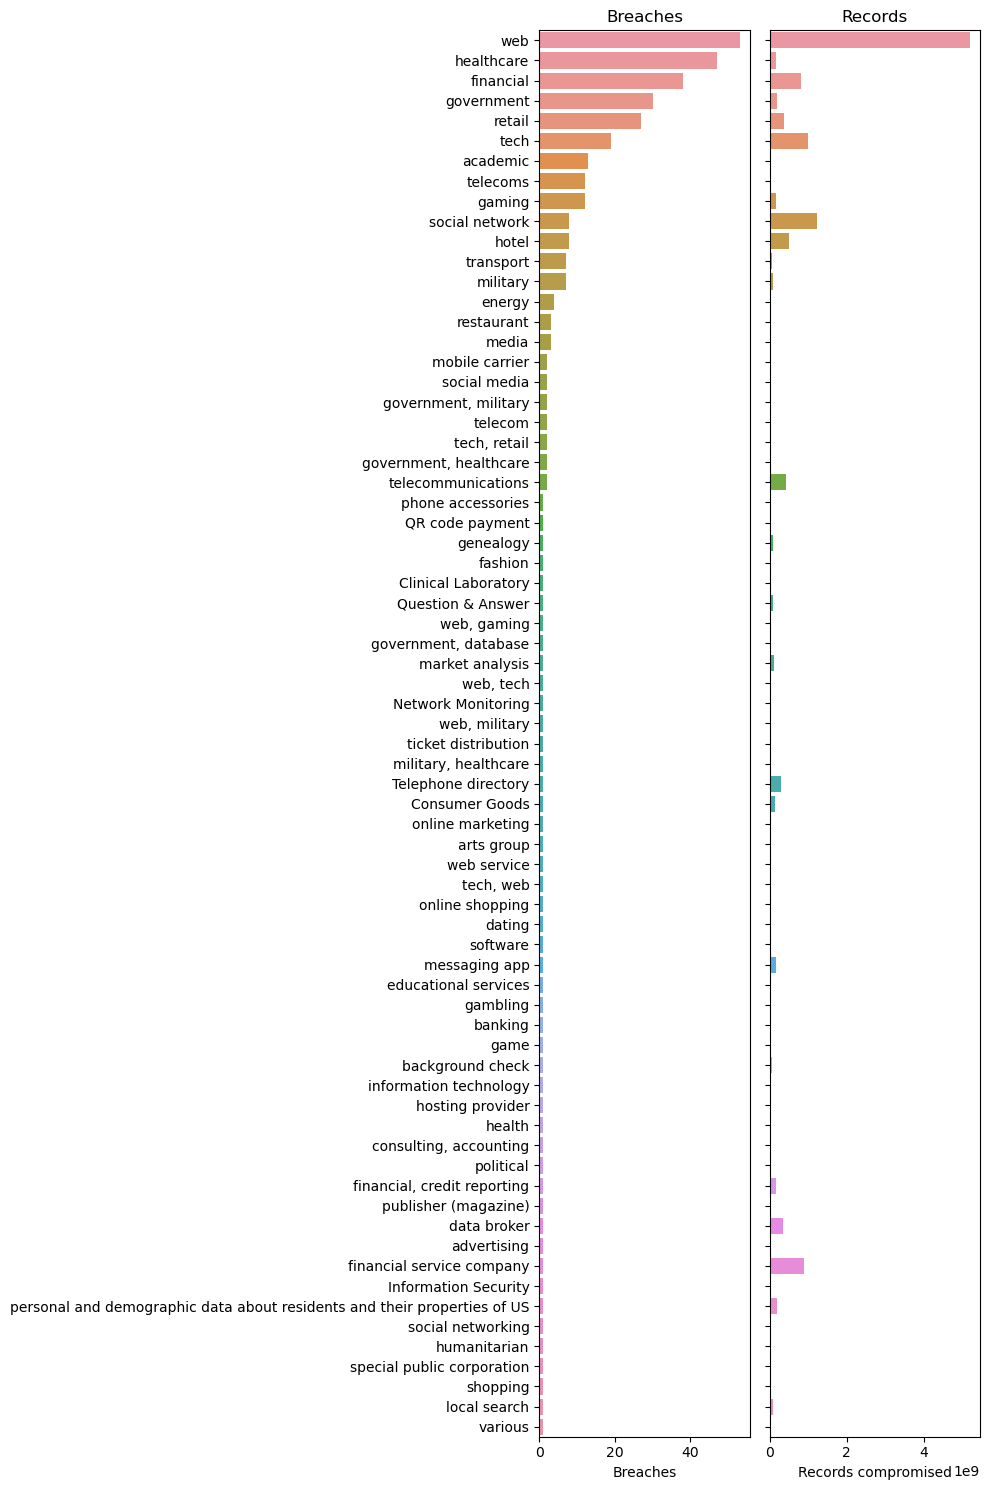

In [90]:
# Plot: Combined visualization of the breach frequency and the number of records for each `Organization type`

f, ax = plt.subplots(1, 2, figsize=(10, 15))

# subplot for organization type
sns.countplot(y='Organization type', data=data_breaches, order=org_order, ax=ax[0])
ax[0].set_title('Breaches')
ax[0].set_xlabel('Breaches')
ax[0].set_ylabel('')

# subplot for number of records, sorted by the order of organization frequency in the data for easier comparison
sns.barplot(x='Total Records', y='Organization type', data=org_records_order, order=org_order, ax=ax[1])
ax[1].set_title('Records')
ax[1].set_xlabel('Records compromised')
ax[1].set_ylabel('')

ax[1].set_yticklabels([])  # Remove tick labels (organization names) for records subplot
plt.tight_layout()
plt.show()

we can see that there appear to be many similar `Organization type` listings. for instance, `web, tech` and `tech, web` below.  

this is a sign that we could do some additional categorization of the organization types. let's start by creating broad categories, and then we can examine the differences within using subcategories.  

In [36]:
data_breaches.query("`Organization type` == 'web, tech'")

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources,int_records,int_year
247,247,SnapChat,2013,4700000,"web, tech",hacked,[300],4700000.0,2013.0


In [37]:
data_breaches.query("`Organization type` == 'tech, web'")


,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources,int_records,int_year
342,342,Yahoo Japan,2013,22000000,"tech, web",hacked,[402],22000000.0,2013.0


In [ ]:
# create new column that classifies `Organization type` into broader categories
def org_categories(org_type):
    if org_type == 'healthcare' or org_type == 'Clinical Laboratory' or org_type == 'military, healthcare':
        return 'Healthcare/Wellness'
    elif org_type == 'social networking' or org_type == 'social network' or org_type == 'dating' or org_type == 'messaging app' or org_type == 'social media':
        return 'Social Media'
    elif org_type == 'tech' or org_type == 'Information Security':
        return 'Technology/IT'
    elif org_type == 'tech' or org_type == 'Information Security' or org_type == 'information technology':
        return 'Technology/IT'
    elif org_type == 'tech' or org_type == 'Information Security':
        return 'Technology/IT'
    elif org_type == 'tech' or org_type == 'Information Security':
        return 'Technology/IT'
    elif org_type == 'tech' or org_type == 'Information Security':
        return 'Technology/IT'
    elif org_type == 'tech' or org_type == 'Information Security':
        return 'Technology/IT'
    elif org_type == 'tech' or org_type == 'Information Security':
        return 'Technology/IT'
    elif org_type == 'tech' or org_type == 'Information Security':
        return 'Technology/IT'
    elif org_type == 'tech' or org_type == 'Information Security':
        return 'Technology/IT'
    elif org_type == 'tech' or org_type == 'Information Security':
        return 'Technology/IT'
    elif org_type == 'tech' or org_type == 'Information Security':
        return 'Technology/IT'
    elif org_type == 'tech' or org_type == 'Information Security':
        return 'Technology/IT'
    elif org_type == 'tech' or org_type == 'Information Security':
        return 'Technology/IT'
    elif org_type == 'tech' or org_type == 'Information Security':
        return 'Technology/IT'
    else:
        return 'None'

data_breaches['org_categories'] = data_breaches['Organization type'].apply(org_categories)
data_breaches

In [ ]:
# Plot: visualize the new organization type categories
org_cat_order = data_breaches['org_categories'].value_counts().index  # specify an order

f, ax = plt.subplots(figsize=(8, 6))
sns.despine()
sns.countplot(y='org_categories', data=data_breaches, order=org_cat_order, ax=ax)
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')

we also see that `Method` could use a similar categorization.  

In [92]:
method_counts = data_breaches['Method'].value_counts()
method_counts

hacked                                                  192
poor security                                            43
lost / stolen media                                      33
accidentally published                                   21
inside job                                               19
lost / stolen computer                                   16
unknown                                                   7
improper setting, hacked                                  2
poor security/inside job                                  2
intentionally lost                                        1
accidentally exposed                                      1
publicly accessible Amazon Web Services (AWS) server      1
hacked/misconfiguration                                   1
rogue contractor                                          1
ransomware hacked                                         1
misconfiguration/poor security                            1
unprotected api                         

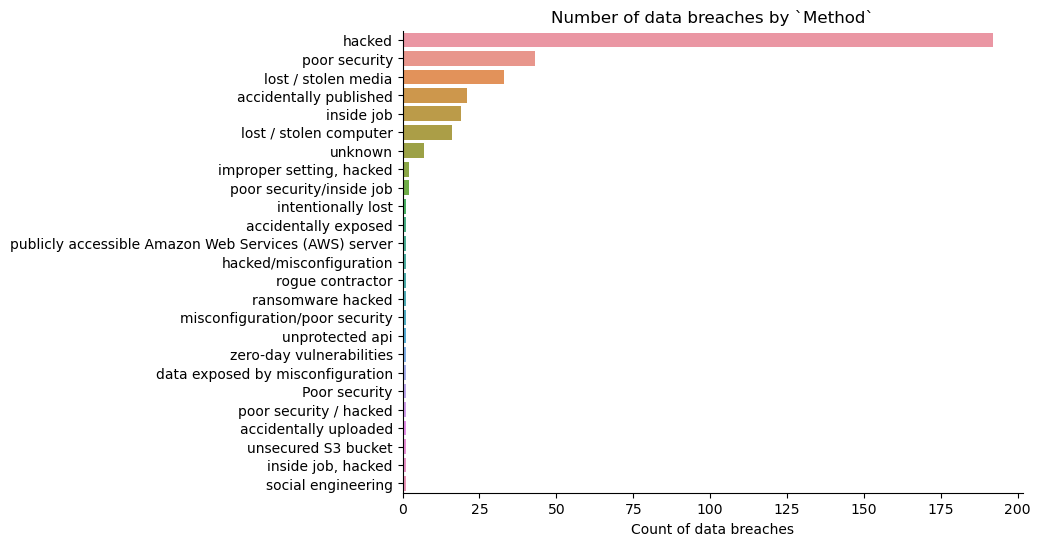

In [93]:
# Plot: count of the data breaches by `Method`
method_order = data_breaches['Method'].value_counts().index 

f, ax = plt.subplots(figsize=(8, 6))
sns.despine()
sns.countplot(y='Method', data=data_breaches, order=method_order, ax=ax)
ax.set_title('Number of data breaches by `Method`')
ax.set_xlabel('Count of data breaches')
ax.set_ylabel('')
plt.show()

In [ ]:
# create new column that classifies `Method` by broader categories
def method_categories(method):
    if method == 'hacked' or method == 'inside job, hacked' or method == 'poor security/hacked' or method == 'ransomware hacked' or method == 'improper setting, hacked' or method == 'hacked/misconfiguration' or method == 'zero-day vulnerabilities':
        return 'Hacking/Cyberattacks'
    elif method == 'poor security' or method == 'Poor security' or method == 'unsecured S3 bucket' or method == 'unprotected api' or method == 'poor security/inside job' or method == 'misconfiguration/poor security':
        return 'Poor Security Practices'
    elif method == 'accidentally published' or method == 'accidentally uploaded' or method == 'accidentally exposed':
        return 'Accidental Exposure'
    else:
        return 'None'

data_breaches['method_categories'] = data_breaches['Method'].apply(method_categories)
data_breaches

In [ ]:
# Plot: visualize the new method categories 
method_cat_order = data_breaches['method_categories'].value_counts().index 
f, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine()

sns.countplot(y='method_categories', data=data_breaches, order=method_cat_order, ax=ax)
ax.set_title('', weight='bold')
ax.set_xlabel('', weight='bold')
ax.set_ylabel('', weight='bold')

Now that we've categorized organizations and methods more cleanly, we can visualize which methods are most common for different sectors. 

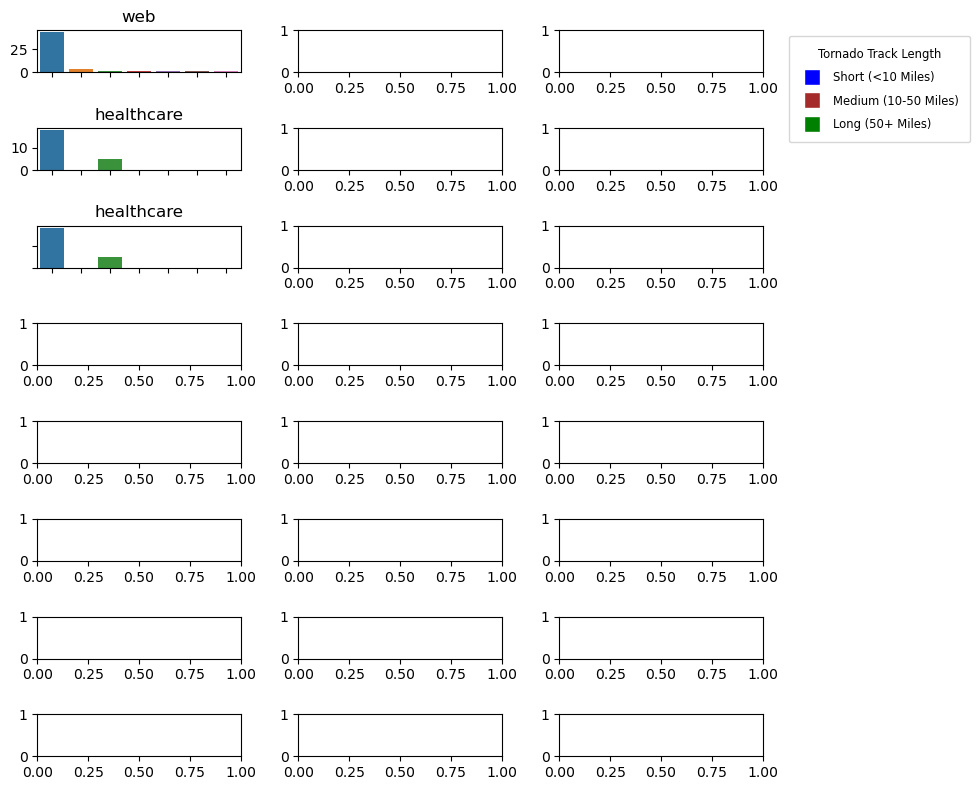

In [38]:
# Plot: 
method_order = web['Method'].value_counts().index

f, ax = plt.subplots(8, 3, figsize=(10, 8))
plt.subplots_adjust(hspace=0, wspace=0)


sns.countplot(x='Method', data=web, order=method_order, ax=ax[0,0])
ax[0,0].set_title('web')
ax[0,0].set_xlabel('', weight='bold')
ax[0,0].set_ylabel('', weight='bold')
ax[0,0].set_xticklabels([]) # remove tick labels
#ax[0,0].set_position([0, 0, 0, 0.0008])  # [left, bottom, width, height]

sns.countplot(x='Method', data=healthcare, order=method_order, ax=ax[1,0])
ax[1,0].set_title('healthcare')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')
ax[1,0].set_xticklabels([]) # remove tick labels

sns.countplot(x='Method', data=healthcare, order=method_order, ax=ax[2,0])
ax[2,0].set_title('healthcare')
ax[2,0].set_xlabel('')
ax[2,0].set_ylabel('')
ax[2,0].set_xticklabels([]) # remove tick labels
ax[2,0].set_yticklabels([]) # remove tick labels

legend_labels=['Short (<10 Miles)', 'Medium (10-50 Miles)', 'Long (50+ Miles)']
legend_colors=['Blue', 'Brown', 'Green']
legend_handles = [plt.Line2D([0], [0], marker='s', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax[0,2].legend(loc='upper left',  bbox_to_anchor=(1.1,1), handles=legend_handles, title='Tornado Track Length', fontsize='small', title_fontsize='small', labelspacing=0.9, borderpad=1, facecolor='white')
#ax[0,0].legend(loc='upper left', bbox_to_anchor=(1, 1))  # customize the legend placement

plt.tight_layout()

In [39]:
web = data_breaches.query("`Organization type` == 'web'")
healthcare = data_breaches.query("`Organization type` == 'healthcare'")
financial = data_breaches.query("`Organization type` == 'financial'")
government = data_breaches.query("`Organization type` == 'government'")
retail = data_breaches.query("`Organization type` == 'retail'")
tech = data_breaches.query("`Organization type` == 'tech'")
academic = data_breaches.query("`Organization type` == 'academic'")
telecoms = data_breaches.query("`Organization type` == 'telecoms'")
gaming = data_breaches.query("`Organization type` == 'gaming'")
social_network = data_breaches.query("`Organization type` == 'social network'")
hotel = data_breaches.query("`Organization type` == 'hotel'")
transport = data_breaches.query("`Organization type` == 'transport'")
military = data_breaches.query("`Organization type` == 'military'")
energy = data_breaches.query("`Organization type` == 'energy'")
restaurant = data_breaches.query("`Organization type` == 'restaurant'")
media = data_breaches.query("`Organization type` == 'media'")
mobile_carrier = data_breaches.query("`Organization type` == 'mobile carrier'")
web = data_breaches.query("`Organization type` == 'web'")
web = data_breaches.query("`Organization type` == 'web'")
web = data_breaches.query("`Organization type` == 'web'")
web = data_breaches.query("`Organization type` == 'web'")
web = data_breaches.query("`Organization type` == 'web'")


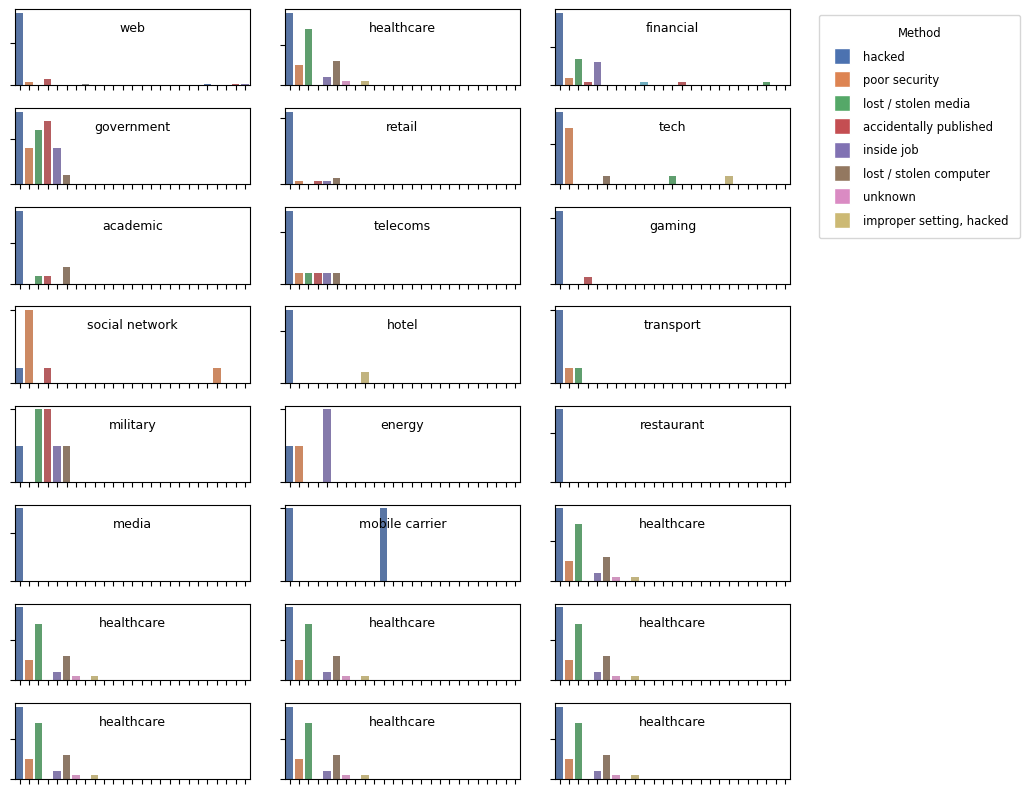

In [40]:
import matplotlib.gridspec as gridspec

f = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 1])  # 1 row, 2 columns

method_order = data_breaches['Method'].value_counts().index 

palette = sns.color_palette("deep", 25)

ax1 = plt.subplot(gs[0,0])
sns.countplot(x='Method', data=web, order=method_order, palette=palette, ax=ax1)
ax1.set_title('web', fontsize=9, y=0.6)
ax1.set_xlabel('', weight='bold')
ax1.set_ylabel('', weight='bold')
ax1.set_xticklabels([]) # remove tick labels
ax1.set_yticklabels([]) # remove tick labels

ax01 = plt.subplot(gs[0,1])
sns.countplot(x='Method', data=healthcare, order=method_order, palette=palette,  ax=ax01)
ax01.set_title('healthcare', fontsize=9, y=0.6)
ax01.set_xlabel('', weight='bold')
ax01.set_ylabel('', weight='bold')
ax01.set_xticklabels([]) # remove tick labels
ax01.set_yticklabels([]) # remove tick labels

ax02 = plt.subplot(gs[0,2])
sns.countplot(x='Method', data=financial, order=method_order, palette=palette,  ax=ax02)
ax02.set_title('financial', fontsize=9, y=0.6)
ax02.set_xlabel('', weight='bold')
ax02.set_ylabel('', weight='bold')
ax02.set_xticklabels([]) # remove tick labels
ax02.set_yticklabels([]) # remove tick labels

ax10 = plt.subplot(gs[1,0])
sns.countplot(x='Method', data=government, order=method_order, palette=palette,  ax=ax10)
ax10.set_title('government', fontsize=9, y=0.6)
ax10.set_xlabel('')
ax10.set_ylabel('')
ax10.set_xticklabels([]) # remove tick labels
ax10.set_yticklabels([]) # remove tick labels

ax11 = plt.subplot(gs[1,1])
sns.countplot(x='Method', data=retail, order=method_order, palette=palette,  ax=ax11)
ax11.set_title('retail', fontsize=9, y=0.6)
ax11.set_xlabel('')
ax11.set_ylabel('')
ax11.set_xticklabels([]) # remove tick labels
ax11.set_yticklabels([]) # remove tick labels

ax12 = plt.subplot(gs[1,2])
sns.countplot(x='Method', data=tech, order=method_order, palette=palette,  ax=ax12)
ax12.set_title('tech', fontsize=9, y=0.6)
ax12.set_xlabel('')
ax12.set_ylabel('')
ax12.set_xticklabels([]) # remove tick labels
ax12.set_yticklabels([]) # remove tick labels

ax20 = plt.subplot(gs[2,0])
sns.countplot(x='Method', data=academic, order=method_order, palette=palette,  ax=ax20)
ax20.set_title('academic', fontsize=9, y=0.6)
ax20.set_xlabel('')
ax20.set_ylabel('')
ax20.set_xticklabels([]) # remove tick labels
ax20.set_yticklabels([]) # remove tick labels

ax21 = plt.subplot(gs[2,1])
sns.countplot(x='Method', data=telecoms, order=method_order, palette=palette,  ax=ax21)
ax21.set_title('telecoms', fontsize=9, y=0.6)
ax21.set_xlabel('')
ax21.set_ylabel('')
ax21.set_xticklabels([]) # remove tick labels
ax21.set_yticklabels([]) # remove tick labels

ax22 = plt.subplot(gs[2,2])
sns.countplot(x='Method', data=gaming, order=method_order, palette=palette,  ax=ax22)
ax22.set_title('gaming', fontsize=9, y=0.6)
ax22.set_xlabel('')
ax22.set_ylabel('')
ax22.set_xticklabels([]) # remove tick labels
ax22.set_yticklabels([]) # remove tick labels

ax30 = plt.subplot(gs[3,0])
sns.countplot(x='Method', data=social_network, order=method_order, palette=palette, ax=ax30)
ax30.set_title('social network', fontsize=9, y=0.6)
ax30.set_xlabel('')
ax30.set_ylabel('')
ax30.set_xticklabels([]) # remove tick labels
ax30.set_yticklabels([]) # remove tick labels

ax31 = plt.subplot(gs[3,1])
sns.countplot(x='Method', data=hotel, order=method_order, palette=palette,  ax=ax31)
ax31.set_title('hotel', fontsize=9, y=0.6)
ax31.set_xlabel('')
ax31.set_ylabel('')
ax31.set_xticklabels([]) # remove tick labels
ax31.set_yticklabels([]) # remove tick labels

ax32 = plt.subplot(gs[3,2])
sns.countplot(x='Method', data=transport, order=method_order,  palette=palette, ax=ax32)
ax32.set_title('transport', fontsize=9, y=0.6)
ax32.set_xlabel('')
ax32.set_ylabel('')
ax32.set_xticklabels([]) # remove tick labels
ax32.set_yticklabels([]) # remove tick labels

ax40 = plt.subplot(gs[4,0])
sns.countplot(x='Method', data=military, order=method_order, palette=palette,  ax=ax40)
ax40.set_title('military', fontsize=9, y=0.6)
ax40.set_xlabel('')
ax40.set_ylabel('')
ax40.set_xticklabels([]) # remove tick labels
ax40.set_yticklabels([]) # remove tick labels

ax41 = plt.subplot(gs[4,1])
sns.countplot(x='Method', data=energy, order=method_order, palette=palette,  ax=ax41)
ax41.set_title('energy', fontsize=9, y=0.6)
ax41.set_xlabel('')
ax41.set_ylabel('')
ax41.set_xticklabels([]) # remove tick labels
ax41.set_yticklabels([]) # remove tick labels

ax42 = plt.subplot(gs[4,2])
sns.countplot(x='Method', data=restaurant, order=method_order,  palette=palette, ax=ax42)
ax42.set_title('restaurant', fontsize=9, y=0.6)
ax42.set_xlabel('')
ax42.set_ylabel('')
ax42.set_xticklabels([]) # remove tick labels
ax42.set_yticklabels([]) # remove tick labels

ax50 = plt.subplot(gs[5,0])
sns.countplot(x='Method', data=media, order=method_order, palette=palette,  ax=ax50)
ax50.set_title('media', fontsize=9, y=0.6)
ax50.set_xlabel('')
ax50.set_ylabel('')
ax50.set_xticklabels([]) # remove tick labels
ax50.set_yticklabels([]) # remove tick labels

ax51 = plt.subplot(gs[5,1])
sns.countplot(x='Method', data=mobile_carrier, order=method_order, palette=palette,  ax=ax51)
ax51.set_title('mobile carrier', fontsize=9, y=0.6)
ax51.set_xlabel('')
ax51.set_ylabel('')
ax51.set_xticklabels([]) # remove tick labels
ax51.set_yticklabels([]) # remove tick labels

ax52 = plt.subplot(gs[5,2])
sns.countplot(x='Method', data=healthcare, order=method_order, palette=palette,  ax=ax52)
ax52.set_title('healthcare', fontsize=9, y=0.6)
ax52.set_xlabel('')
ax52.set_ylabel('')
ax52.set_xticklabels([]) # remove tick labels
ax52.set_yticklabels([]) # remove tick labels

ax60 = plt.subplot(gs[6,0])
sns.countplot(x='Method', data=healthcare, order=method_order,  palette=palette, ax=ax60)
ax60.set_title('healthcare', fontsize=9, y=0.6)
ax60.set_xlabel('')
ax60.set_ylabel('')
ax60.set_xticklabels([]) # remove tick labels
ax60.set_yticklabels([]) # remove tick labels

ax61 = plt.subplot(gs[6,1])
sns.countplot(x='Method', data=healthcare, order=method_order, palette=palette,  ax=ax61)
ax61.set_title('healthcare', fontsize=9, y=0.6)
ax61.set_xlabel('')
ax61.set_ylabel('')
ax61.set_xticklabels([]) # remove tick labels
ax61.set_yticklabels([]) # remove tick labels

ax62 = plt.subplot(gs[6,2])
sns.countplot(x='Method', data=healthcare, order=method_order, palette=palette,  ax=ax62)
ax62.set_title('healthcare', fontsize=9, y=0.6)
ax62.set_xlabel('')
ax62.set_ylabel('')
ax62.set_xticklabels([]) # remove tick labels
ax62.set_yticklabels([]) # remove tick labels

ax70 = plt.subplot(gs[7,0])
sns.countplot(x='Method', data=healthcare, order=method_order, palette=palette,  ax=ax70)
ax70.set_title('healthcare', fontsize=9, y=0.6)
ax70.set_xlabel('')
ax70.set_ylabel('')
ax70.set_xticklabels([]) # remove tick labels
ax70.set_yticklabels([]) # remove tick labels

ax71 = plt.subplot(gs[7,1])
sns.countplot(x='Method', data=healthcare, order=method_order, palette=palette,  ax=ax71)
ax71.set_title('healthcare', fontsize=9, y=0.6)
ax71.set_xlabel('')
ax71.set_ylabel('')
ax71.set_xticklabels([]) # remove tick labels
ax71.set_yticklabels([]) # remove tick labels

ax72 = plt.subplot(gs[7,2])
sns.countplot(x='Method', data=healthcare, order=method_order, palette=palette,  ax=ax72)
ax72.set_title('healthcare', fontsize=9, y=0.6)
ax72.set_xlabel('')
ax72.set_ylabel('')
ax72.set_xticklabels([]) # remove tick labels
ax72.set_yticklabels([]) # remove tick labels

# define colors for each "top" category
first_color = palette[0]
second_color = palette[1]
third_color = palette[2]
fourth_color = palette[3]
fifth_color = palette[4]
sixth_color = palette[5]
seventh_color = palette[6]
eighth_color = palette[8]
ninth_color = palette[9]

legend_labels=['hacked', 'poor security', 'lost / stolen media', 'accidentally published', 'inside job', 'lost / stolen computer', 'unknown', 'improper setting, hacked']
legend_colors=[first_color, second_color, third_color, fourth_color, fifth_color, sixth_color, seventh_color, eighth_color, ninth_color]
legend_handles = [plt.Line2D([0], [0], marker='s', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax02.legend(loc='upper left',  bbox_to_anchor=(1.1,1), handles=legend_handles, title='Method', fontsize='small', title_fontsize='small', labelspacing=0.9, borderpad=1, facecolor='white')
#ax[0,0].legend(loc='upper left', bbox_to_anchor=(1, 1))  # customize the legend placement

# Adjust spacing between subplots
gs.update(hspace=0.3, wspace=0.15)  # Adjust horizontal spacing


now, we can do the same thing but with the number of records. this will tell us which methods seem to be most severe for diffrent sectors. 